In [48]:
import matplotlib.pyplot as plt
from skimage import data, io
from sklearn.mixture import GaussianMixture
import numpy as np

In [49]:
image = data.camera()

(h, w) = image.shape
print('h=', h, 'w=', w)

data = np.reshape(image, (h*w, 1))
print(data.shape)

num_class = 2
gmm = GaussianMixture(n_components=num_class)
gmm.fit(data)

binary = gmm.predict(data).reshape((h, w))
print(binary)

h= 512 w= 512
(262144, 1)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [50]:
means = gmm.means_
vars = gmm.covariances_
weights = gmm.weights_

print(means)
print(vars)
print(weights)



output = np.zeros((h,w))
print(output[1, 2])
#for i in range(h):
#    for j in range(w):
#        output[i, j] = means[binary[i, j]]

output = means[binary]
print(output)
    

[[172.89556672]
 [ 25.68282969]]
[[[1200.14855437]]

 [[ 165.3108228 ]]]
[0.70223473 0.29776527]
0.0
[[[172.89556672]
  [172.89556672]
  [172.89556672]
  ...
  [172.89556672]
  [172.89556672]
  [172.89556672]]

 [[172.89556672]
  [172.89556672]
  [172.89556672]
  ...
  [172.89556672]
  [172.89556672]
  [172.89556672]]

 [[172.89556672]
  [172.89556672]
  [172.89556672]
  ...
  [172.89556672]
  [172.89556672]
  [172.89556672]]

 ...

 [[ 25.68282969]
  [ 25.68282969]
  [ 25.68282969]
  ...
  [172.89556672]
  [172.89556672]
  [172.89556672]]

 [[ 25.68282969]
  [ 25.68282969]
  [ 25.68282969]
  ...
  [172.89556672]
  [172.89556672]
  [172.89556672]]

 [[ 25.68282969]
  [ 25.68282969]
  [ 25.68282969]
  ...
  [172.89556672]
  [172.89556672]
  [172.89556672]]]


/tmp/ipykernel_16233/1229093426.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])


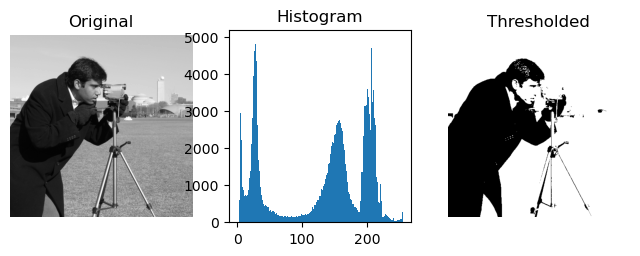

In [51]:

#thresh = threshold_otsu(image)
#binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
#ax[1].axvline(thresh, color='r')

ax[2].imshow(output, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

In [52]:
image = io.imread('harewood.jpg')
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

NameError: name 'threshold_otsu' is not defined

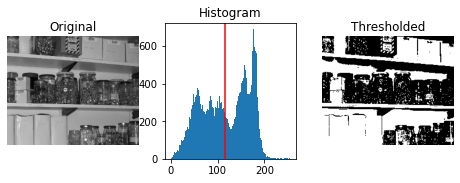

In [ ]:
image = io.imread('nutsBolts.jpg')
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

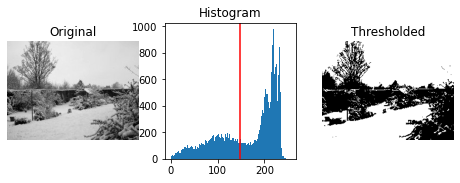

In [ ]:
image = io.imread('snow.jpg')
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()